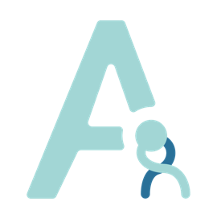

# Latent Dirichlet Allocation
### Authors: Matei-Gabriel Cosa & Kassym Mukhanbetiyar

### BAINSA Research Meeting 29/09/2023 - History of Machine Intelligence

In today's presenation, we will have a look at a demo of Latent Dirichlet Allocation (LDA) using standard ML libraries. Feel free to play around with the code and input your own text corpus. Enjoy!

## Preliminaries
We first need to import some useful libraries. Besides the usual suspects (`numpy`, `matplotlib`, etc.), we need import the LDA model from `sklearn`. Furthermore, we need some NLP tools from `nltk` and the `wordcloud` module to make some visualizations of our results.

In [10]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords


Let us now define our text corpus. Here you can input whatever you think might be interesting to explore, like your favourite novel or article. From academic papers, to music lyrics, feel free to play around with your data.

In [68]:
# Sample corpus 
corpus = [ 
    "In the history of space exploration, animals have played a vital role in paving the way for human astronauts. These brave and furry pioneers have ventured beyond our planet's atmosphere, contributing to our understanding of how living organisms respond to the challenges of space travel. The journey of animals in space began in the 1940s and 1950s during the early days of the Space Race. One of the first animals in space was Laika, a courageous dog from the Soviet Union. Laika became the first living creature to orbit the Earth aboard Sputnik 2 in 1957. Although her mission was a one-way trip and she did not survive the journey, Laika's sacrifice paved the way for human spaceflight. Following Laika, a variety of animals, including monkeys, mice, and even fruit flies, were sent into space on suborbital and orbital missions. These missions helped scientists understand the effects of microgravity and radiation on living organisms. Monkeys like Albert I, II, and III were among the early space travelers, providing valuable insights into the biological challenges of space travel. One of the most famous animal astronauts was Ham, a chimpanzee, who embarked on a suborbital flight aboard the Mercury-Redstone 2 spacecraft in 1961. Ham's successful mission demonstrated that humans could perform tasks in space, paving the way for human spaceflight. Beyond Earth's orbit, animals have also ventured to the Moon. In 1968, the crew of Apollo 8 carried fruit flies with them on their historic lunar orbit mission. These tiny passengers provided insights into the effects of deep space radiation. Today, animals continue to contribute to space research, albeit under strict ethical guidelines. Their missions help scientists better understand the impacts of space travel on living organisms, and this knowledge is crucial for planning long-duration human missions to Mars and beyond. While the role of animals in space research has evolved over the years, their contributions remain significant. They remind us of the pioneers who paved the way for human exploration of the cosmos, and they continue to teach us valuable lessons about life beyond our home planet.",
    "In space, specially designed lightweight and long-lasting space food, including dehydrated, freeze-dried, and thermostabilized options, is essential for astronaut nutrition during missions that span months or years, with menus planned by nutritionists, and unique challenges like microgravity requiring innovative packaging and dining experiences that foster camaraderie and support human exploration of the cosmos. In the vast and challenging realm of space, astronauts rely on specially designed space food to sustain them during their missions, which must be lightweight, compact, and have a long shelf life; space food comes in forms such as dehydrated, freeze-dried, and thermostabilized items, and menus are carefully planned by nutritionists and dietitians to ensure a balanced diet, with special attention to bone health; in microgravity, liquids are consumed through pouches with straws, and solid foods are packaged to prevent crumbs; while the dining experience lacks ambiance, it serves as a moment of respite and socialization; recent advancements include gardening in space and research into future space cuisine for long-duration missions, making space food a testament to human ingenuity and a vital component of space exploration. Astronauts' menus include a variety of options, from fruits and vegetables to meats, grains, and desserts. To ensure they receive a balanced diet, space agencies work with nutritionists and dietitians to plan meals that provide the necessary vitamins, minerals, and macronutrients. Special attention is given to vitamin D and calcium to maintain bone health during prolonged space missions. One unique challenge in space is the absence of gravity. In microgravity, liquids do not behave the same way as on Earth, making drinking from a cup or straw impractical. As a result, astronauts often consume beverages like coffee, tea, and fruit juices through specially designed pouches equipped with straws. Solid foods are carefully packaged to prevent crumbs, which could interfere with equipment or become inhalable.",
    "Animal food, whether for pets or livestock, varies widely based on species and dietary needs, with ingredients ranging from grains and vegetables to meat and specialized formulations, all aimed at ensuring proper nutrition and health for the animals in question. Vegetables and meat are both types of food that are usually consumed due to their mix of nutirents and proteins. Ensuring your animal is on a heltahy diet adapted to its species' needs. Food is an essential component of your animal's wellbeing. Nutrition is a key part of animals' happiness. Make sure you feed your pet enough proteins and necessary substances. On the orther hand, do not let your pet eat food that is not appropriate, such as pizza, burgers, or other food made for humans. This can be very dangerous for your animal. Poor animal nutrition poses significant risks to the health and well-being of our furry and feathered friends. Just as humans require a balanced diet to thrive, animals, whether pets or livestock, also need proper nutrition to lead healthy lives. When their dietary needs are not met, a range of health issues and risks can arise. Animals need a variety of nutrients, including proteins, carbohydrates, fats, vitamins, and minerals, to maintain their health. Inadequate nutrition can lead to deficiencies in these essential elements, resulting in various health problems. For example, a lack of certain vitamins can lead to issues like rickets or scurvy in pets or livestock. Proper nutrition is vital for a robust immune system. Animals with poor diets may have weakened immune systems, making them more susceptible to infections and diseases. This is especially concerning for livestock, as it can lead to disease outbreaks that affect entire herds, Young animals require specific nutrients for proper growth and development. Inadequate nutrition during this crucial stage can lead to stunted growth, developmental abnormalities, and long-term health problems. nadequate nutrition can affect an animal's reproductive health. Female animals may have difficulty conceiving, maintaining pregnancies, or delivering healthy offspring. Male animals may experience reduced fertility."
]

## Pre-processing
At this stage we need to perform some standard NLP pre-processing to our text before feeding it to the LDA model. This means tokenizing the text, removing stop words, and organizing our data in the form of a document-term matrix, i.e. a bag-of-words matrix. In this data structure, every row corresponds to a document and every column corresponds to a word in our vocabulary.

In [69]:
# Tokenization and preprocessing
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return " ".join(words)

corpus = [preprocess_text(text) for text in corpus]

# Create a document-term matrix
vectorizer = CountVectorizer(max_df=0.85, max_features=10, stop_words="english")
dtm = vectorizer.fit_transform(corpus)

## Applying LDA
We now intialize an istance of the LDA model from `sklearn`. At this step we need to specify the number of topics we are interested in finding.

In [70]:
# Perform LDA
num_topics = 3  # Change this to the desired number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm);

## Visualizing the results
Using *word cloud*, we seek to understand the strucuture of the topics resulting from the LDA model. To do this, we slect the most probable words given the topic and display them using the `wordcloud` module. This approach may be useful for summarizing large bodies of text as part of some exploratory data analysis.

In [71]:
# Display word clouds for each topic
def plot_word_clouds(lda_model, feature_names, num_words=6):
    num_topics = lda_model.n_components
    
    # Define the layout for subplots
    rows = int(np.ceil(num_topics / 2))
    cols = 2
    
    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    axes = axes.ravel()
    
    for topic_idx, topic in enumerate(lda_model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        wordcloud = WordCloud(width=400, height=200, background_color="white").generate(" ".join(topic_words))
        
        # Plot in the appropriate subplot
        ax = axes[topic_idx]
        ax.imshow(wordcloud, interpolation="bilinear")
        ax.set_title(f"Topic {topic_idx + 1}")
        ax.axis("off")
    
    # Remove any empty subplots
    for i in range(num_topics, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()


# Display word clouds for topics
feature_names = vectorizer.get_feature_names_out()

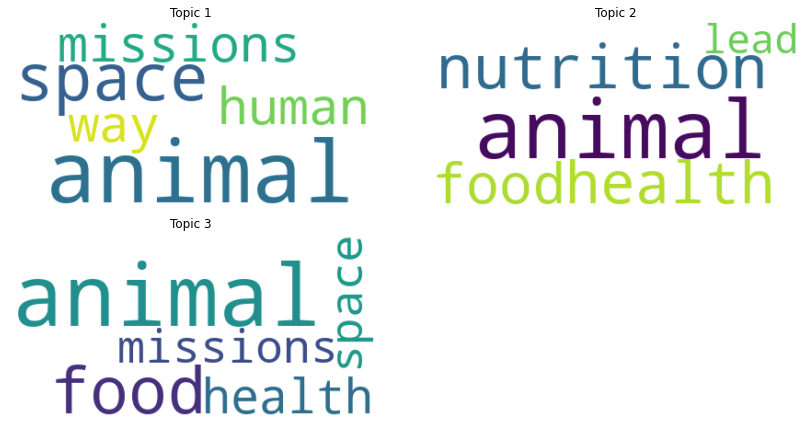

In [72]:
plot_word_clouds(lda, feature_names)

Let us now observe the probability distribution over the topics for each document:

In [76]:
topic_mixture = lda.transform(dtm)
topic_mixture.round(2)

array([[0.98, 0.01, 0.01],
       [0.72, 0.27, 0.01],
       [0.01, 0.98, 0.01]])

Let's see what happens when we assume there are only two latent topics:

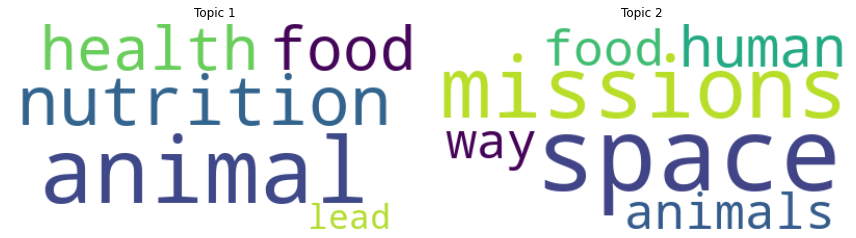

In [79]:
lda_2_topics = LatentDirichletAllocation(n_components = 2, random_state = 42)
lda_2_topics.fit(dtm)
plot_word_clouds(lda_2_topics, feature_names)

In this case, the topic mixture looks as follows:

In [80]:
topic_mixture = lda_2_topics.transform(dtm)
topic_mixture.round(2)

array([[0.02, 0.98],
       [0.07, 0.93],
       [0.99, 0.01]])

## Takeaways
LDA is a very useful model for summarizing bodies of text. Using a hierarchical bayesian model allows us to develop a flexible framework for constructing a generative process associated to a corpus of text. One particular strength of this model is the fact that we are agnostic to the content/actual topics present in the documents, since we do not have to specify them a priori. On the other hand, as seen from our toy example, it may not be entirely clear how to pick the number of topics in a way that would yield the most information. A bit of experimentation and perhaps some domain expertise can help significantly when performing exploratory data analysis for textual data. 

# Thank you!